# Inferencia Bayesiana Entrega 1: Maitas Moran LU 806/19

## Guia 1 - Ejercicio 9
El jugador Montiel convirtio los 12 penales que pateo al dia de la fecha en su carrera profesional

a) Usando un prior beta de la probabilidad que tiene Montiel de convertir un penal, es decir tita ~ Beta(alpha, beta) encontrar la distribución posterior para tita y graficarla (definir a gusto los parámetros alpha y beta de la distribución).

### Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### a) Usando un prior beta de la probabilidad que tiene Montiel de convertir un penal, es decir tita ~ Beta(alpha, beta) encontrar la distribución posterior para tita y graficarla (definir a gusto los parámetros alpha y beta de la distribución).

Para este ejericio vamos a usar 2 Priors para ver si contienen diferencias significatibas entre si y que resultados obtenemos de cada uno.

- Para el primer Prior "Naive" Usamos como Prior $\Beta(13, 4)$ porque nos parece una distribucion que modela bien la probabilidad de que un jugador convierta un penal en base a la intuicion de saber que es mas probable que un jugador convierta un penal

- El segundo prior va a ser una distribucion Beta en base a los datos historicos de penales de los 26 jugadores campeones del mundo en Qatar 2022 :argentina:

Para cada uno de estos prior queremos encontrar la distribucion posterior para $\theta$

Primero calculamos la Likehood de ver los datos de montiel asumiendo que cada penal se comporta como un experimento de bernoulli con probabilidad $\theta$, es decir que cada penal tiene la misma probabilidad de terminar en gol y que es independiente del penal anterior (esto es un modelo simplista ya que implica que no depende del arquero, del contexto del partido, de lesiones de jugadores, etc)

- $\theta \sim  \Beta(\alpha_{0}, \beta_{0})$

- $L(\theta | datosMontiel) = P(12/12 | \theta) = \theta^{12}$
- $Prior(\theta) \propto \theta^{\alpha_{0} - 1} \cdot (1 - \theta)^{\beta_{0} - 1}$ 



Podemos calcular la *Post* para cada *Prior* como:

- $Post(\theta | datosMontiel) \propto  L(\theta | datosMontiel) \cdot p(\theta)$

- $Post(\theta | datosMontiel) \propto \theta^{12} \cdot \theta^{\alpha_{0} - 1} \cdot (1 - \theta)^{\beta_{0} - 1}$

- $Post(\theta | datosMontiel) \propto \theta^{\alpha_{0} + 11} \cdot (1 - \theta)^{\beta_{0} - 1}$

- $Post(\theta | datosMontiel) \sim Beta(\alpha_{0} + 12, \beta_{0}) $



In [4]:
montiel_penalty_goals = 12
montiel_penalty_misses = 0

# Prior naive
naive_prior_alpha = 13
naive_prior_beta = 4

naive_post_alpha = naive_prior_alpha + montiel_penalty_goals
naive_post_alpha = naive_prior_beta + montiel_penalty_misses

In [10]:
#Scrapeamos manualmente la base de trasnfermarkt para obtener la info
df_arg = pd.DataFrame({"Player":[], "Goals":[], "Misses":[]})

df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["FrancoArmani"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/119634
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GeronimoRulli"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/229604
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["EmilianoMartinez"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/111873
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["JuanFoyth"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/480763
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["NicolasTagliafico"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/131225
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GonzaloMontiel"], "Goals":[5], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/402733
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GermanPezzella"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/113133
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["MarcosAcuña"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/60410
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["CristianRomero"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/355915
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["NicolásOtamendi"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/54781
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LisandroMartínez"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/480762
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["NahuelMolina"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/424042
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LeandroParedes"], "Goals":[9], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/166237
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["RodrigodePaul"], "Goals":[10], "Misses":[3]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/255901
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["ExequielPalacios"], "Goals":[6], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/401578
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["AlejandroGómez"], "Goals":[6], "Misses":[4]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/20005
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["GuidoRodriguez"], "Goals":[0], "Misses":[0]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/342385
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["AlexisMacAllister"], "Goals":[12], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/534033
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["EnzoFernandez"], "Goals":[6], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/648195
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["JuliánÁlvarez"], "Goals":[7], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/576024
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LionelMessi"], "Goals":[110], "Misses":[31]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/28003
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["AngelDiMaría"], "Goals":[11], "Misses":[5]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/45320
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["ÁngelCorrea"], "Goals":[1], "Misses":[1]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/266807
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["ThiagoAlmada"], "Goals":[13], "Misses":[6]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/576028
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["PauloDybala"], "Goals":[39], "Misses":[5]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/206050
df_arg = pd.concat([df_arg] + [pd.DataFrame({"Player":["LautaroMartínez"], "Goals":[16], "Misses":[8]})], ignore_index=True) #https://www.transfermarkt.com/a/elfmetertore/spieler/406625

df_arg

,Player,Goals,Misses
0,FrancoArmani,0.0,0.0
1,GeronimoRulli,0.0,0.0
2,EmilianoMartinez,0.0,0.0
3,JuanFoyth,0.0,0.0
4,NicolasTagliafico,0.0,0.0
5,GonzaloMontiel,5.0,0.0
6,GermanPezzella,0.0,0.0
7,MarcosAcuña,0.0,0.0
8,CristianRomero,0.0,0.0
9,NicolásOtamendi,0.0,0.0


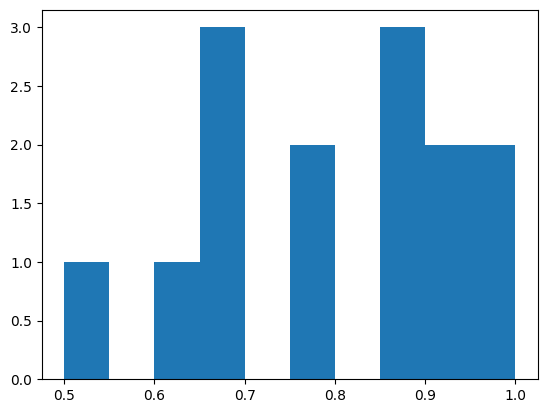

In [14]:
#Para la simplicidad del analisis vamos a filtrar todos los jugadores que no patearon penales, aunque estaria bueno ver que tanto empeora en el resultado final

df_arg = df_arg[(df_arg.Goals != 0) | (df_arg.Misses != 0)]
df_arg['GoalRatio'] = df_arg['Goals'] / (df_arg['Goals'] + df_arg['Misses'])

plt.plot()
plt.hist(df_arg['GoalRatio'])
plt.show()

In [ ]:
# Prior Campeones del mundo
df_arg = pd.DataFrame({"Player":[], "Goals":[], "Misses":[], "GoalRatio":[]})

df_arg = df_arg.append({"Player":"FrancoArmani", "Goals":0, "Misses":0, "GoalRatio":0}, ignore_index=True)

naive_prior_alpha = 13
naive_prior_beta = 4

naive_post_alpha = naive_prior_alpha + montiel_penalty_goals
naive_post_alpha = naive_prior_beta + montiel_penalty_misses

### b) ¿Cual es la probabilidad de que convierta el penal número 13? ¿Cómo se compara con la estimación frecuentista?

Vamos a buscar la probabilidad de que Montiel convierta el penal numero 13.

Promedio 0.9260518111532569
Esperanza 0.9285714285714286


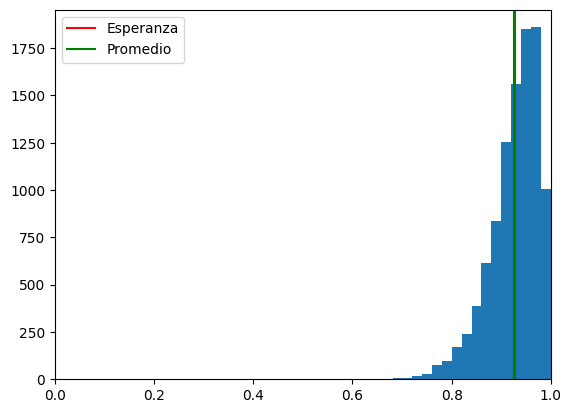

In [10]:
# Generamos unos titas randoms.
# A partir de esos titas simulamos la cantidad de goles hechos.
# Estos goles los guardamos en "tiros".
tiros = np.array([])
for i in range(1,10000):
    tita = np.random.beta(25, 2)
    tiros = np.append(tiros, tita)


# Calculamos la mediana y el promedio de "tiros" 
mean= np.mean(tiros)
print("Promedio", mean)
print("Esperanza", 13 / (13+1))     # E = alpha / alpha + beta 
fig, ax = plt.subplots(1)
ax.hist(tiros, bins = 20)
ax.set_xlim(0,1)
ax.axvline(13 / (13+1), color ="red", label = "Esperanza")
ax.axvline(mean, color = "green", linestyle = "-", label = "Promedio")
ax.legend()
plt.show()

- Segun los Bayesianos, tenemos un 92.6% de probabilidades de ver a Montiel meter el 13vo tiro.

- Mientras que los frecuentistas dirian que es el 100%.

### c)  ¿Qué supuestos estamos haciendo sobre el proceso que generó los datos?

- Estamos tomando por sentado muchas cosas que deberian influir en su precision, (arquero, pelota, etc).
- Estamos asumiendo que nadie mete el 100% de los tiros.


### d)  Haciendo simulaciones, crear un histograma de la distribución predicha de penales convertidos en los próximos 10 penales que ejecute Montiel (posterior predictive distribution).

Nuestor array de tiros metidos: [10. 10. 10. ... 10. 10. 10.]
Promedio predicho: 9.251325132513252


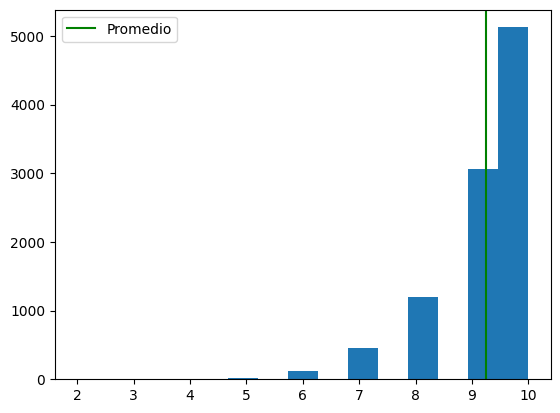

In [8]:
# Vamos a simular este experimento 10mil veces:
tiros_predichos = np.array([])
for i in range(1,10000):
    # Generamos aleatoriamente nuestro tita.
    tita = np.random.beta(25, 2)

    # Generamos aleatoriamente cuantos goles metió de los 10 tiros.
    goles = np.random.binomial(10, tita)

    # Guardamos los tiros en un array
    tiros_predichos = np.append(tiros_predichos, goles)
print("Nuestor array de tiros metidos:", tiros_predichos)

mean= np.mean(tiros_predichos)
print("Promedio predicho:", mean)
fig, ax = plt.subplots(1)
ax.hist(tiros_predichos, bins = 15)
ax.axvline(mean, color = "green", label = "Promedio")
ax.legend()
plt.show()

### e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

Teniendo el Histograma anterior, podriamos simplemente sumar los casos en que Montiel haya metido 8, 9 y 10 penales y dividirlos por la cantidad total de intentos. 

In [18]:
# Filtramos los casos en que Montiel haya metido >= 8 goles
tiros_predichos_filtrados = [tiro for tiro in tiros_predichos if tiro >= 8]

# Calculamos el promedio frecuentista de que meta >= 8 goles.
len(tiros_predichos_filtrados) / len(tiros_predichos)

0.9395939593959396